### Importações

In [32]:
import pandas as pd
import numpy as np
import sys
import os

In [33]:
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, '..'))
if project_root not in sys.path:
    sys.path.append(project_root)
from Functions.FNC_Pro import lista_produtos, configurar_credenciais_bq, Base_venda

In [34]:
SKU = '7172'

### Base de vendas

In [35]:
configurar_credenciais_bq(r'G:Drives compartilhados/Bases BI/epoca-230913-b478a9a0dd4c.json')

Venda = Base_venda(SKU)

SKU 7172: Histórico de dados ajustado para começar em 2023-01-01, o primeiro dia com vendas.


In [46]:
Venda.head(20)

,SKU,Preco_Listado,Preco,Demanda,Log_Preco,Log_Demanda,Log_Demanda_7D,Ano_Mes,Black_Friday,Domingo,Quarta-feira,Quinta-feira,Segunda-feira,Sexta-feira,Sábado,Terça-feira,Log_Preco_7D,promocionado_25,promocionado_50
Data,,,,,,,,,,,,,,,,,,,
2023-01-01,7172,288.60,288.60,9.0,5.665042,2.197225,2.197225,2023-01,0,1,0,0,0,0,0,0,5.665042,0,0
2023-01-02,7172,293.45,293.45,19.0,5.681707,2.944439,2.639057,2023-01,0,0,0,0,1,0,0,0,5.673409,0,0
2023-01-03,7172,285.77,285.77,22.0,5.655187,3.091042,2.813411,2023-01,0,0,0,0,0,0,0,1,5.667372,0,0
2023-01-04,7172,284.20,284.20,36.0,5.649678,3.583519,3.068053,2023-01,0,0,1,0,0,0,0,0,5.662978,0,0
2023-01-05,7172,271.27,271.27,41.0,5.603115,3.713572,3.234749,2023-01,0,0,0,1,0,0,0,0,5.651288,0,0
2023-01-06,7172,276.80,276.80,48.0,5.623295,3.871201,3.373027,2023-01,0,0,0,0,0,1,0,0,5.646677,0,0
2023-01-07,7172,277.27,277.27,38.0,5.624992,3.637586,3.415382,2023-01,0,0,0,0,0,0,1,0,5.643608,0,0
2023-01-08,7172,276.32,276.32,37.0,5.621560,3.610918,3.538887,2023-01,0,1,0,0,0,0,0,0,5.637378,0,0
2023-01-09,7172,280.63,280.63,48.0,5.637037,3.871201,3.652512,2023-01,0,0,0,0,1,0,0,0,5.630833,0,0


### Avaliação estatística

=== AVALIAÇÃO ESTATÍSTICA PARA SKU 7172 ===

1. ESTATÍSTICAS DESCRITIVAS:
           Preco    Demanda  Log_Preco  Log_Demanda  Log_Preco_7D  \
count  1004.0000  1004.0000  1004.0000    1004.0000     1004.0000   
mean    301.9520    52.3944     5.7051       3.6524        5.7050   
std      31.0707    57.9851     0.1019       0.8016        0.0947   
min     224.1700     0.0000     5.4124      -4.6052        5.4253   
25%     279.8025    23.0000     5.6341       3.1355        5.6424   
50%     296.1850    39.5000     5.6910       3.6762        5.6911   
75%     322.5900    67.0000     5.7764       4.2047        5.7701   
max     381.0100  1048.0000     5.9428       6.9546        5.9173   

       Log_Demanda_7D  
count       1004.0000  
mean           3.7428  
std            0.6492  
min            2.0053  
25%            3.2512  
50%            3.7545  
75%            4.2200  
max            5.5984  


2. VALORES MISSING:
SKU                0
Preco_Listado      0
Preco              0
Dem

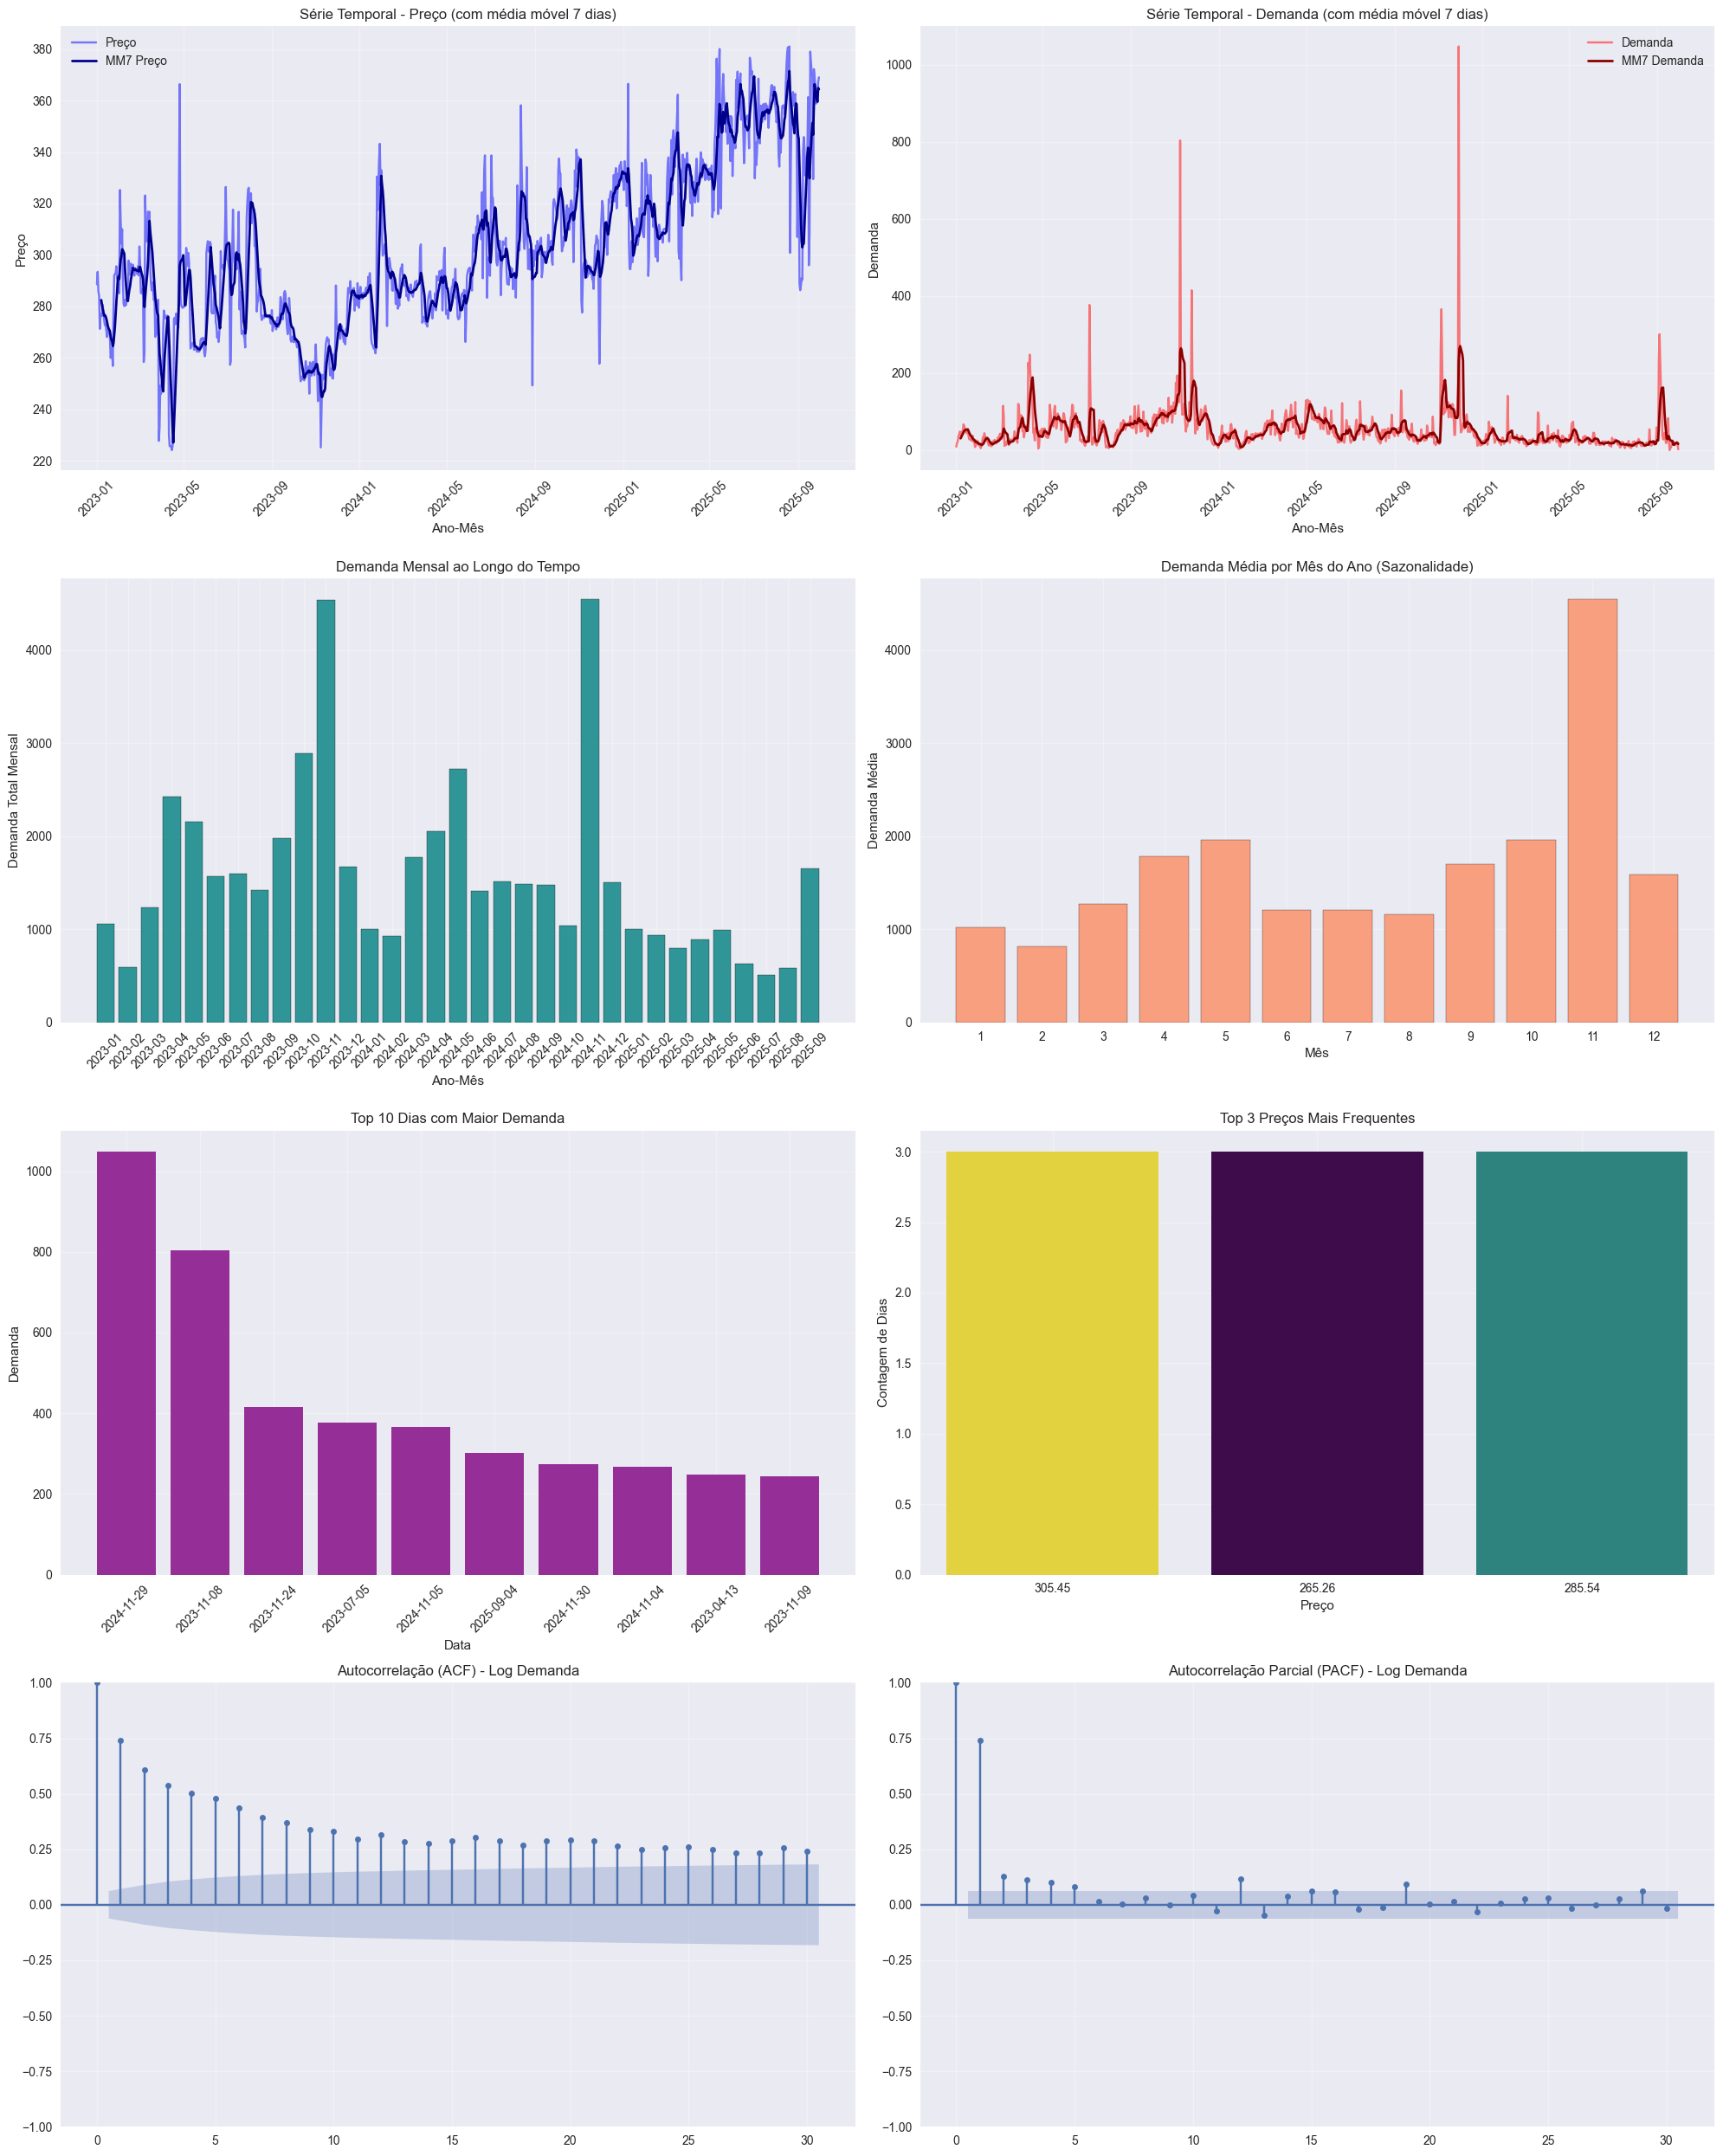

7. ANÁLISE DE SAZONALIDADE POR DIA DA SEMANA:
Demanda média por dia da semana:
  Segunda-feira: 49.78
  Terça-feira: 54.27
  Quarta-feira: 62.10
  Quinta-feira: 55.54
  Sexta-feira: 56.50
  Sábado: 43.85
  Domingo: 44.78

8. RESUMO E RECOMENDAÇÕES PARA MODELAGEM:
TODAS as variáveis são estacionárias - OK para modelagem

 Correlação Log_Preco x Log_Demanda: -0.6853
   → Correlação forte - bom preditor

 RECOMENDAÇÕES FINAIS PARA VALIDAÇÃO CRUZADA:
1. Variáveis já estacionárias - pode prosseguir diretamente
4. Use TimeSeriesSplit do sklearn para validação cruzada temporal
5. Monitore overfitting comparando performance treino/teste
6. Considere modelos SARIMA para capturar sazonalidade

 Análise concluída - Dados prontos para modelagem!


(     AnoMes       Preco  Demanda  Log_Preco  Log_Demanda
 0   2023-01  277.904194   1061.0   5.626527     3.411263
 1   2023-02  293.395000    591.0   5.680943     2.949246
 2   2023-03  283.633548   1231.0   5.644110     3.463641
 3   2023-04  267.951667   2422.0   5.584715     4.070361
 4   2023-05  272.690000   2154.0   5.607220     4.179816
 5   2023-06  289.950000   1572.0   5.668227     3.767679
 6   2023-07  291.666129   1599.0   5.673398     3.480653
 7   2023-08  289.580968   1422.0   5.666726     3.592199
 8   2023-09  275.104667   1975.0   5.616945     4.147224
 9   2023-10  257.608065   2889.0   5.551188     4.519359
 10  2023-11  257.092333   4539.0   5.548513     4.801911
 11  2023-12  277.811613   1675.0   5.626540     3.706341
 12  2024-01  290.621290   1004.0   5.668785     3.225261
 13  2024-02  291.815517    932.0   5.675720     3.401869
 14  2024-03  286.570968   1777.0   5.657736     4.003538
 15  2024-04  284.508333   2051.0   5.650393     4.151876
 16  2024-05  

In [37]:
from Functions.FNC_aval_estat import avaliar_dados_series_temporais

avaliar_dados_series_temporais(Venda,SKU)

### Modelo: Validação Cruzada de Séries Temporais

In [38]:
from Functions.FNC_TSCV import modelo_validacao_cruzada_series_temporais, converter_para_escala_original,encontrar_melhor_alpha


resultados_modelo_principal = modelo_validacao_cruzada_series_temporais(
    Venda, SKU, 
    'Log_Preco',                                                                   #Variáveis independentes
    'Quarta-feira', 'Terça-feira'
    ,var_dpd = 'Log_Demanda'                                                       #Variáveis dependentes
    ,n_splits=10
)

# Converter para a escala original
metricas_originais = converter_para_escala_original(resultados_modelo_principal, Venda)

# Encontre o melhor alpha, mas armazene em variáveis diferentes para não sobrescrever
X_cols = ['Log_Preco','Black_Friday','promocionado_25', 'Quarta-feira','Terça-feira']
y_col = 'Log_Demanda'
melhor_alpha, resultados_alpha = encontrar_melhor_alpha(Venda, X_cols, y_col)

=== MODELO DE VALIDAÇÃO CRUZADA - SKU 7172 ===

Verificando qualidade dos dados...
 Executando validação cruzada temporal...
 Fold 1:
   Período teste: 2023-04-05 a 2023-07-04
   RMSE: 0.8247, WAPE: 17.67%
 Fold 2:
   Período teste: 2023-07-05 a 2023-10-03
   RMSE: 0.6076, WAPE: 13.32%
 Fold 3:
   Período teste: 2023-10-04 a 2024-01-02
   RMSE: 0.6718, WAPE: 13.10%
 Fold 4:
   Período teste: 2024-01-03 a 2024-04-02
   RMSE: 0.4632, WAPE: 10.15%
 Fold 5:
   Período teste: 2024-04-03 a 2024-07-02
   RMSE: 0.6307, WAPE: 13.84%
 Fold 6:
   Período teste: 2024-07-03 a 2024-10-01
   RMSE: 0.4981, WAPE: 11.32%
 Fold 7:
   Período teste: 2024-10-02 a 2024-12-31
   RMSE: 0.8314, WAPE: 17.24%
 Fold 8:
   Período teste: 2025-01-01 a 2025-04-01
   RMSE: 0.3497, WAPE: 8.17%
 Fold 9:
   Período teste: 2025-04-02 a 2025-07-01
   RMSE: 0.4541, WAPE: 11.39%
 Fold 10:
   Período teste: 2025-07-02 a 2025-09-30
   RMSE: 0.9377, WAPE: 15.19%

 RESULTADOS FINAIS DO MODELO
 Métricas Médias nos 10 folds:
   R

### Modelo: SARIMAX 

In [39]:
from Functions.FNC_SARIMAX import modelo_sarimax, encontrar_melhores_parametros_sarimax

# Variáveis exógenas - agora incluindo os dias da semana para uma comparação justa
exog_vars_sarimax = [
    'Log_Preco',
    'Quarta-feira',
    'Terça-feira'
]

# Encontrar os melhores parâmetros para o SKU atual, incluindo o termo de tendência (intercepto)
best_order, best_seasonal_order, best_trend = encontrar_melhores_parametros_sarimax(
    Venda,
    SKU,
    *exog_vars_sarimax,
    endog_var='Log_Demanda'
)

# Treinar o modelo SARIMAX com os parâmetros otimizados
resultado_sarimax = modelo_sarimax(
    Venda, 
    SKU, 
    *exog_vars_sarimax,
    endog_var='Log_Demanda',
    order= best_order, 
    seasonal_order=best_seasonal_order,
    trend = best_trend
)


--- Buscando Melhores Parâmetros SARIMAX para SKU: 7172 ---

--- Iniciando busca de parâmetros para modelo de Regressão com Erros ARMA (d=0, D=0) ---
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1620.849, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2516.201, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1620.849, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2516.201, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1644.157, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2003.765, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1644.157, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2003.765, Time=0.20 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1051.134, Time=0.83 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1630.238, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1051.134, Time=0.83 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1630.238, Time=0.13 sec
 ARIMA(3,0,1)(

### Consolidação e Comparação de Previsões

In [40]:
from Functions.FNC_Previsoes import gerar_previsoes_e_relatorios

# Definir o caminho para a planilha de preços
caminho_previsao = 'C:/Users/joao.pcarvalho/Desktop/Git Repositórios/Forecast-vendas-e-elasticidade/Forecast/Precos_para_previsoes.xlsx'

# Definir as colunas de features usadas nos modelos
X_cols_tscv = ['Log_Preco', 'Quarta-feira', 'Terça-feira']

# Gerar as previsões e o relatório de comparação em uma única chamada
df_previsoes, df_relatorio = gerar_previsoes_e_relatorios(
    resultados_modelo_principal,
    resultado_sarimax,
    SKU,
    caminho_previsao,
    X_cols_tscv=X_cols_tscv
)

--- INICIANDO GERAÇÃO DE PREVISÕES E RELATÓRIOS ---

Calculando previsões para o SKU 7172 com o modelo de Validação Cruzada (TSCV)...
Calculando previsões para o SKU 7172 com o modelo SARIMAX...
  DECISÃO: TSCV escolhido como modelo ideal (baseado no AIC)

Arquivo de previsões salvo em: ../Resultados/previsoes_consolidadas_7172.csv
Arquivo de relatório de modelos salvo em: ../Resultados/relatorio_comparacao_modelos_7172.csv

--- Processo Concluído ---


In [41]:
print("DataFrame com as Previsões Consolidadas:")
df_previsoes.head(31)

DataFrame com as Previsões Consolidadas:


,Data,SKU,Preco,previsao_SARIMAX,previsao_TSCV,previsao_total
0,2025-09-18,7172,379,9.552446,9.739209,9.739209
1,2025-09-19,7172,375,0.239163,10.259826,10.498989
2,2025-09-20,7172,370,4.355338,10.958525,15.313862
3,2025-09-21,7172,369,8.274282,11.105059,11.105059
4,2025-09-22,7172,329,24.932446,19.502698,19.502698
5,2025-09-23,7172,372,14.309482,12.068928,12.068928
6,2025-09-24,7172,369,20.610298,12.687939,12.687939
7,2025-09-25,7172,366,16.151843,11.559034,11.559034
8,2025-09-26,7172,358,17.656959,12.883384,12.883384
9,2025-09-27,7172,360,14.136318,12.535882,12.535882


In [42]:
print("DataFrame com o Relatório de Comparação dos Modelos:")
df_relatorio.head()

DataFrame com o Relatório de Comparação dos Modelos:


,sku,data_rodagem,modelo_ideal,intercepto_tscv,coef_log_preco_tscv,coef_quarta-feira_tscv,coef_terça-feira_tscv,intercepto_sarimax,coef_log_preco_sarimax,coef_quarta-feira_sarimax,coef_terça-feira_sarimax,AIC_sarimax,BIC_sarimax,AIC_cruzado,BIC_cruzado
0,7172,2025-09-30 18:14:23,TSCV,31.418288,-4.908118,0.133251,0.122975,4.331827,-4.728633,0.26211,0.041078,1201.610816,1245.789609,746.276733,762.400228


### Visualização da Performance das Previsões

--- GERANDO GRÁFICOS DE COMPARAÇÃO DE PREVISÕES PARA SKU 7172 ---


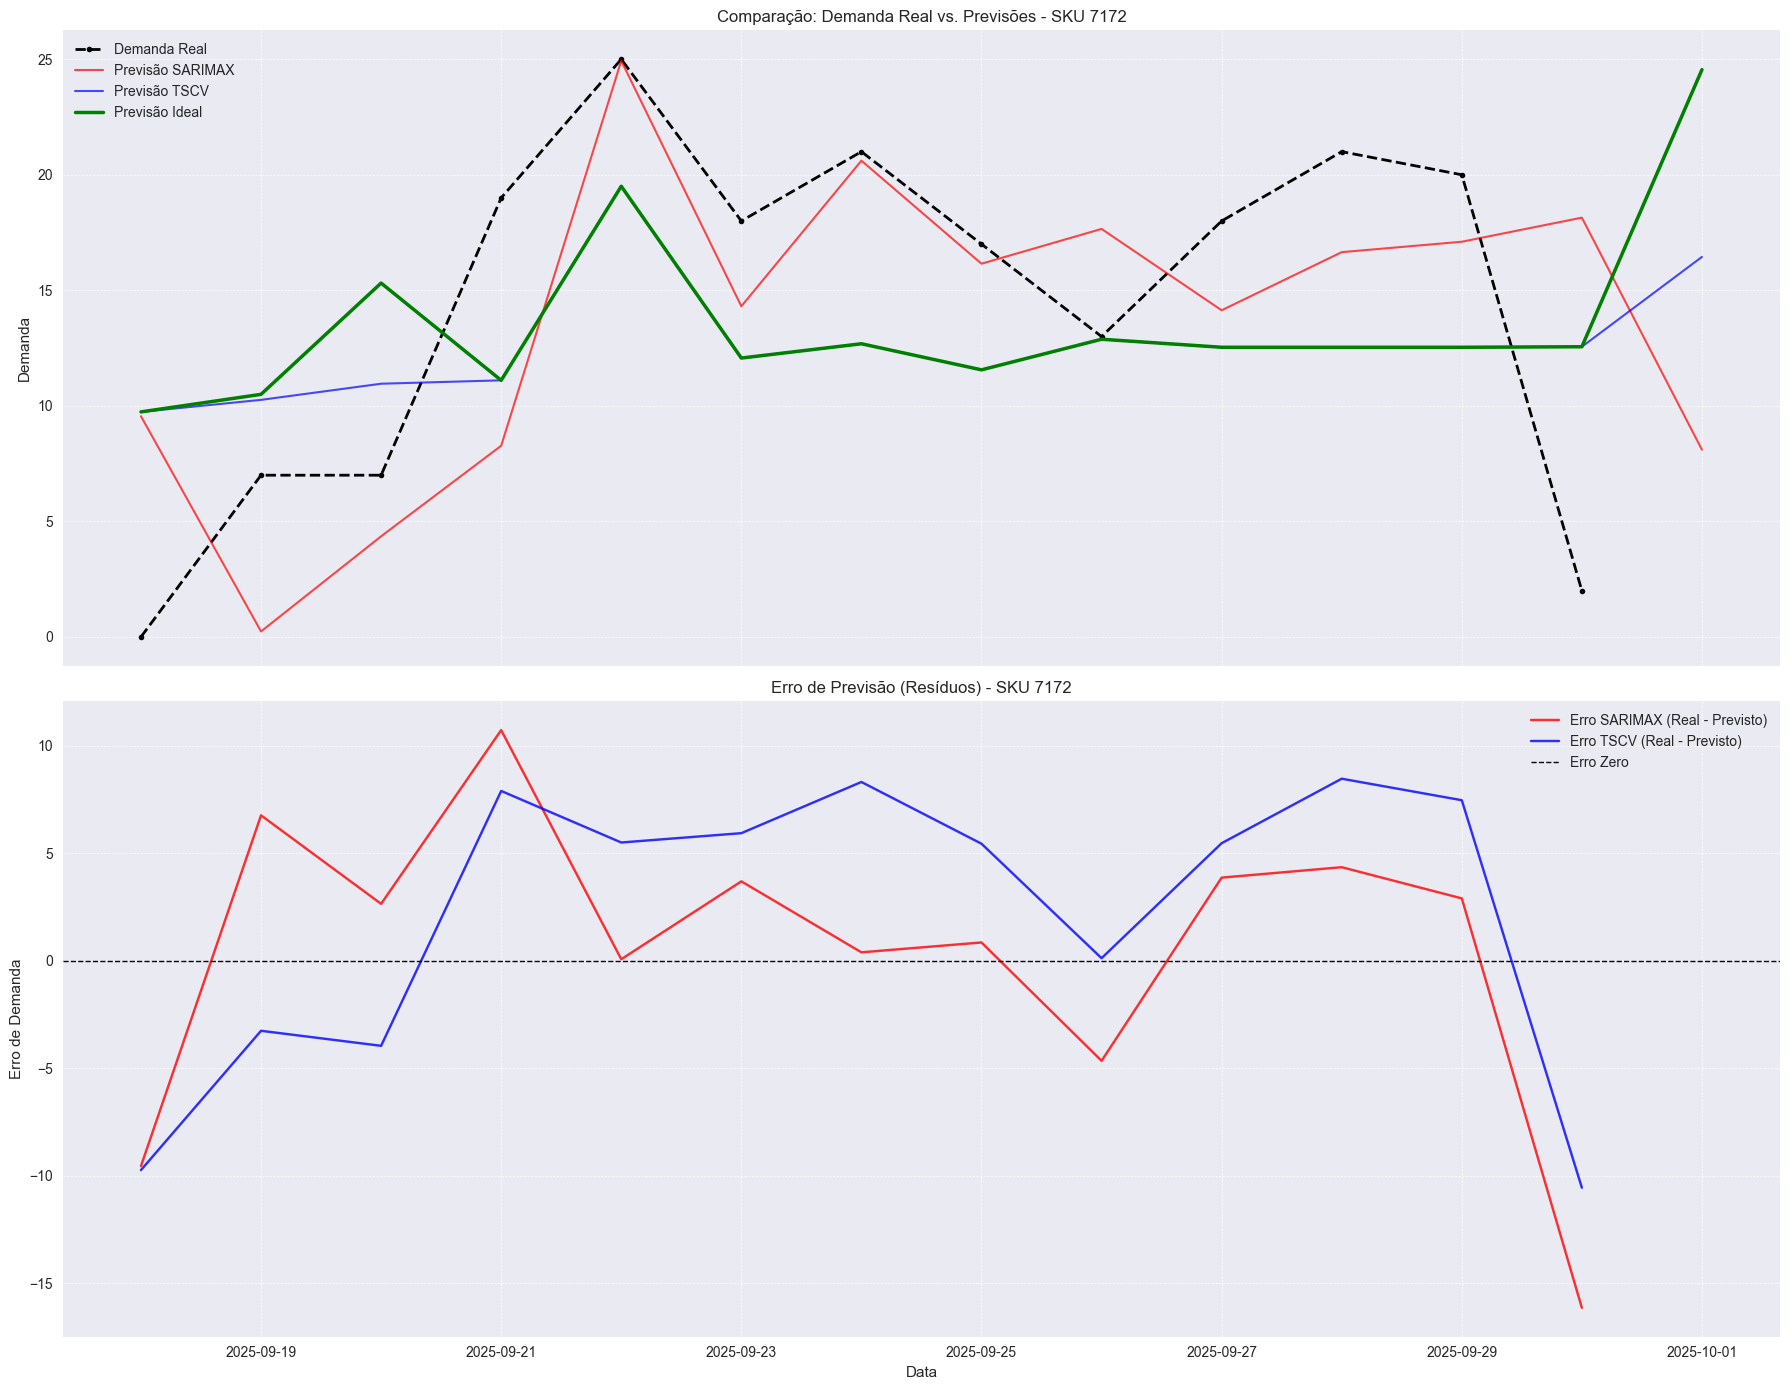

In [43]:
from Functions.FNC_aval_estat import plotar_comparacao_previsoes


plotar_comparacao_previsoes(df_previsoes, Venda, SKU)

### Previsão Futura (Próximos 30 Dias)

--- INICIANDO PREVISÃO PARA OS PRÓXIMOS 30 DIAS (SKU: 7172) ---
Último preço registrado: 369.00 em 2025-09-30
Para os próximos 30 dias, o preço será baseado no mesmo dia 30 dias atrás, ou no último preço se a data não existir.
  Gerando gráfico de previsão futura...

Gráfico de previsão salvo em: ../Graficos/previsao_30_dias_sku_7172.png

Gráfico de previsão salvo em: ../Graficos/previsao_30_dias_sku_7172.png


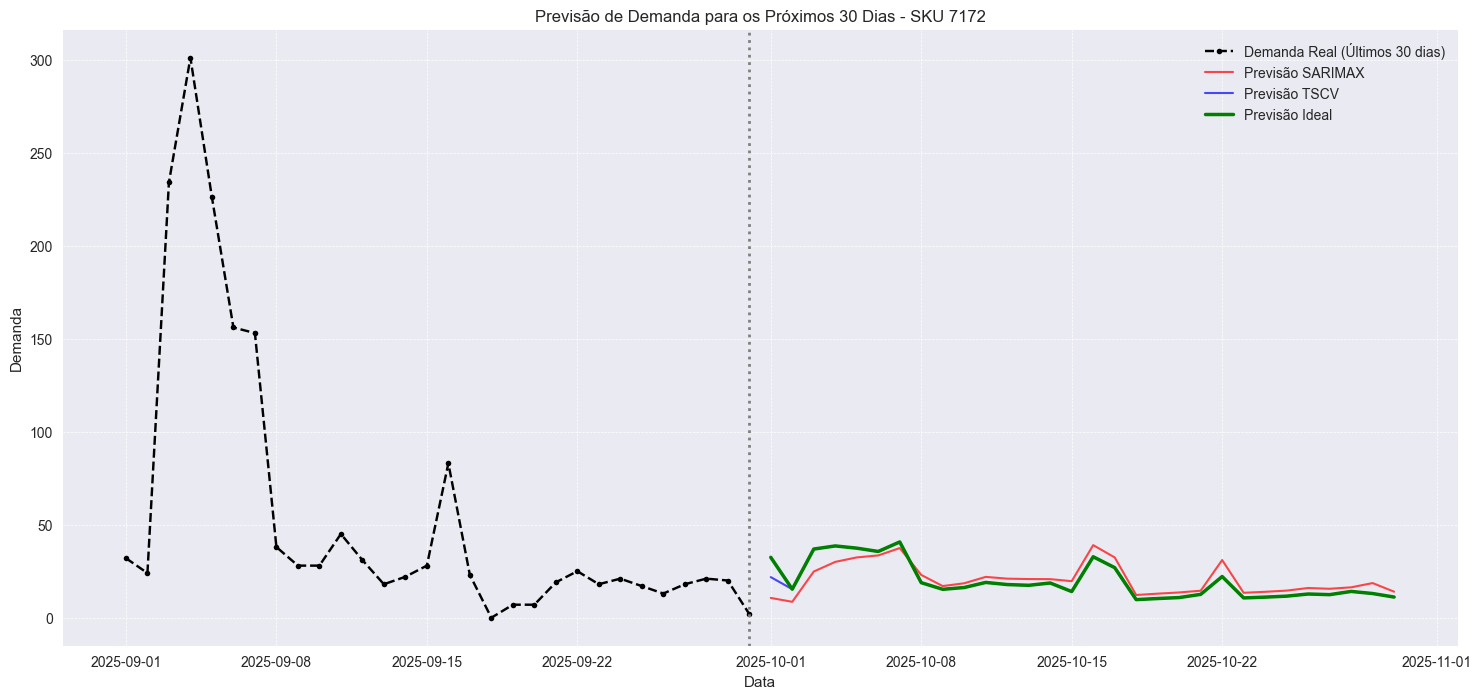

In [44]:
from Functions.FNC_Previsoes import pred_prox_30_dias

# Gerar o gráfico e o DataFrame com a previsão para os próximos 30 dias
df_previsao_futura = pred_prox_30_dias(
    resultados_modelo_principal,
    resultado_sarimax,
    Venda,
    SKU,
    X_cols_tscv=X_cols_tscv
)

In [45]:
print("DataFrame com a previsão para os próximos 30 dias:")
df_previsao_futura.head(31)

DataFrame com a previsão para os próximos 30 dias:


,Data,SKU,Preco,Log_Preco,Quarta-feira,Terça-feira,previsao_TSCV,previsao_SARIMAX,previsao_total
0,2025-10-01,7172,330.41,5.800334,1,0,21.819718,10.637751,32.457469
1,2025-10-02,7172,345.51,5.845022,0,0,15.336453,8.556583,15.336453
2,2025-10-03,7172,288.91,5.666115,0,0,36.904227,24.825944,36.904227
3,2025-10-04,7172,286.30,5.657040,0,0,38.585143,30.013199,38.585143
4,2025-10-05,7172,288.14,5.663446,0,0,37.390798,32.412800,37.390798
5,2025-10-06,7172,291.01,5.673358,0,0,35.615449,33.476773,35.615449
6,2025-10-07,7172,290.34,5.671053,0,1,40.734202,37.421482,40.734202
7,2025-10-08,7172,340.45,5.830268,1,0,18.838349,22.997513,18.838349
8,2025-10-09,7172,345.79,5.845832,0,0,15.275598,17.012215,15.275598
9,2025-10-10,7172,341.52,5.833406,0,0,16.236179,18.520040,16.236179
